In [1]:
import numpy as np

In [2]:
elbo = np.load("1kq2A00_elbo-labels-elbo-labels-elbo.npy")

In [3]:
elbo

array(['1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00',
       '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00',
       '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00',
       '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00',
       '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00', '1kq2A00',
       '1kq2A00', '1kq2A00'], dtype='<U7')

In [4]:
import torch

In [5]:
elbo = torch.load("1kq2A00_elbo-elbo-elbo.pt")

In [6]:
elbo

tensor([0.1671, 0.1656, 0.1659, 0.1663, 0.1656, 0.1650, 0.1628, 0.1647, 0.1650,
        0.1654, 0.1661, 0.1642, 0.1656, 0.1646, 0.1641, 0.1674, 0.1654, 0.1653,
        0.1643, 0.1650, 0.1647, 0.1665, 0.1663, 0.1646, 0.1651, 0.1664, 0.1664,
        0.1643, 0.1629, 0.1664, 0.1628, 0.1645, 0.1640, 0.1645, 0.1633, 0.1659,
        0.1650, 0.1642, 0.1649, 0.1649, 0.1640, 0.1646, 0.1640, 0.1655, 0.1639,
        0.1649, 0.1663, 0.1636, 0.1617, 0.1644, 0.1648, 0.1677, 0.1648, 0.1659,
        0.1654, 0.1639, 0.1652, 0.1635, 0.1634, 0.1666, 0.1627, 0.1641, 0.1637,
        0.1668, 0.1681, 0.1652, 0.1660, 0.1640, 0.1657, 0.1635, 0.1661, 0.1648,
        0.1661, 0.1637, 0.1628, 0.1661, 0.1650, 0.1633, 0.1655, 0.1638, 0.1674,
        0.1646, 0.1655, 0.1656, 0.1639, 0.1648, 0.1644, 0.1640, 0.1642, 0.1661,
        0.1646, 0.1658, 0.1640, 0.1664, 0.1630, 0.1667, 0.1653, 0.1648, 0.1655,
        0.1650, 0.1665, 0.1656, 0.1643, 0.1643, 0.1658, 0.1653, 0.1641, 0.1663,
        0.1655, 0.1654, 0.1658, 0.1657, 

In [7]:
len(elbo)

1000

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
pwd

'/home/bournelab/DeepUrfold-updated_results/test_rotations'

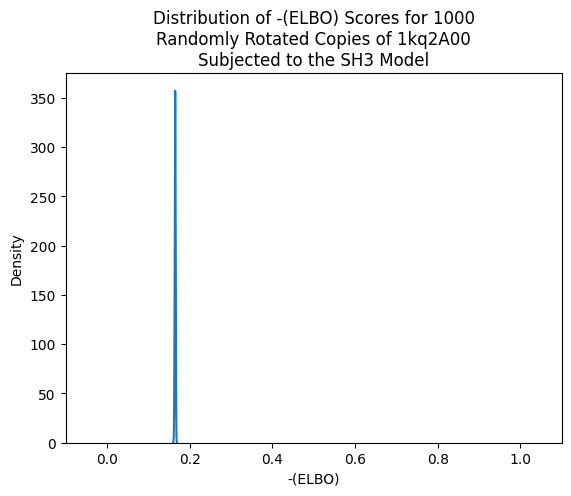

In [10]:
sns.kdeplot(data=pd.DataFrame({"-(ELBO)":elbo}), x="-(ELBO)") 
plt.xlim(-0.1,1.1)
plt.title("-(ELBO) of 1000 rotations of 1kq2A00\nsubjected to the SH3 model")
plt.title("Distribution of -(ELBO) Scores for 1000\nRandomly Rotated Copies of 1kq2A00\nSubjected to the SH3 Model")
plt.savefig("1kq2A00_rotation_elbo_scores.pdf", dpi=600, bbox_inches="tight")
plt.savefig("1kq2A00_rotation_elbo_scores.png", dpi=600, bbox_inches="tight")

In [11]:
len(elbo)

1000

In [12]:
latent = torch.load("1kq2A00_latent-mean-mean.pt")

In [13]:
latent

tensor([[ 0.0092,  0.0057,  0.0543,  ..., -0.0374,  0.0096, -0.0186],
        [ 0.0087,  0.0153,  0.0008,  ..., -0.0268,  0.0136,  0.0152],
        [ 0.0330, -0.0057,  0.0079,  ..., -0.0142, -0.0181,  0.0021],
        ...,
        [ 0.0141, -0.0096,  0.0088,  ...,  0.0022,  0.0154, -0.0071],
        [ 0.0103,  0.0147,  0.0083,  ...,  0.0055,  0.0315,  0.0095],
        [ 0.0358, -0.0278,  0.0348,  ..., -0.0210,  0.0151, -0.0094]])

In [14]:
from sklearn.metrics import pairwise_distances

In [15]:
raw_distances = pairwise_distances(latent, metric="cosine")

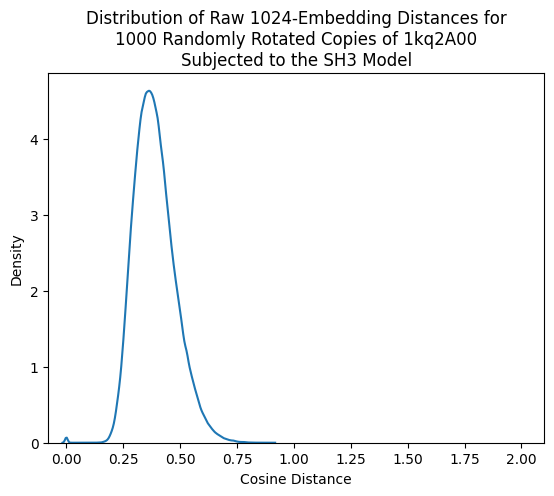

In [16]:
sns.kdeplot(raw_distances.flatten())
plt.xlim(-0.08,2.1)
plt.title("Distribution of Raw 1024-Embedding Distances for\n1000 Randomly Rotated Copies of 1kq2A00\nSubjected to the SH3 Model")
plt.xlabel("Cosine Distance")
plt.savefig("1kq2A00_rotation_raw_embedding_distances_v2.pdf", dpi=600, bbox_inches="tight")
plt.savefig("1kq2A00_rotation_raw_embedding_distances_v2.png", dpi=600, bbox_inches="tight")

In [23]:
import pickle
with open("../new_latent_spaze_viz_wide/COSINESIM--cosine-umap-reducer-model.pickle", "rb") as f:
    reducer = pickle.load(f)

In [25]:
umap_embeddings = reducer.transform(latent)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 1024 while Y.shape[1] == 20480

In [24]:
distance_umap = pairwise_distances(umap_embeddings, metric="cosine")

NameError: name 'umap_embeddings' is not defined